In [1]:
import numpy as np
import editdist
import random

corpus = []
letters = []
x = 1
for i in open ('/home/elbially/Speech Experiments/englishCorpus.txt'):
    tmp = i.split('\n')[0]
    if not (tmp == ''):
        corpus.append(tmp)
        letters.append((tmp))
corpus = np.array(corpus)
dist = np.empty((corpus.shape[0],corpus.shape[0]))
for i in xrange(0,corpus.shape[0]):
    for j in xrange (0,corpus.shape[0]):
        dist[i][j] =  editdist.distance(corpus[i],corpus[j])

In [44]:
import numpy as np
import editdist
import random
import codecs

corpus = []
x = 1
for i in open ('/home/elbially/Speech Experiments/arabicCorpus.txt'):
    tmp = i.split('\n')[0]
    if not (tmp == ''):
        corpus.append('u'+tmp)
        
corpus = np.array(corpus)
dist = np.empty((corpus.shape[0],corpus.shape[0]))
for i in xrange(0,corpus.shape[0]):
    for j in xrange (0,corpus.shape[0]):
        dist[i][j] =  editdist.distance(corpus[i],corpus[j])

In [47]:
'u'+corpus[0]

'uu\xd8\xb5\xd9\x81\xd8\xb1'

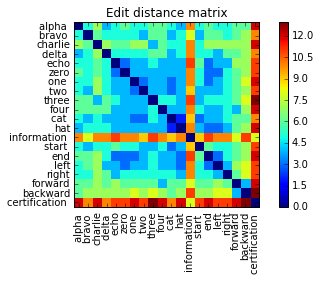

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(dist, interpolation='nearest')
plt.xticks(np.arange(0,corpus.shape[0]), corpus,rotation=90)
plt.yticks(np.arange(0,corpus.shape[0]), corpus)
plt.colorbar()
plt.title("Edit distance matrix")
plt.tight_layout()
plt.show()
plt.savefig('EditDistance.jpg',transparent=True,bbox_inches="tight")

In [2]:
numOfWords = 3
numOfSentences = 20
f= open("transcript.txt", "w")
for i in xrange(1,numOfSentences):
    sent = corpus[random.sample(xrange(1,corpus.shape[0]), numOfWords)]
    sent = sent.tolist()
    sent = '%03d' % i + '. ' + ' '.join(sent)
    f.write(sent + '\n' + '\r\n')
    print sent
f.close()

001. three charlie hat 
002. stop rat ten
003. hat  start  information 
004. forward nine bravo 
005. ten five left
006. charlie right eight
007. six eight certification 
008. backward five six
009. rat two  echo
010. stop information  right
011. delta  hat  technology
012. ten certification  rat
013. four seven end
014. forward stop distance
015. zero delta  bravo 
016. backward end eight
017. cat  three seven
018. information  six one 
019. charlie six rat


In [41]:
s = u'القاموس العربي'

In [48]:
s[2]

u'\u0642'

In [49]:
print s


القاموس العربي


In [51]:
unicode(s, 'utf-8')[1]

TypeError: decoding Unicode is not supported

In [8]:
x = np.array([1,2,3,4,5,6,7,8,9,10])

[ 3  5  7 19  6  3 15  9 11 18  0  7  5  5 15 10 12  4 14 12  7  9 13  8 11
  2  1 12  0 14  0  6 19 16  3 13  4  6 14 17 10 19  8  9  2 16  2 10 13 15
 18 16  8 17 18 11  1  4  1 17]
[ 3  5  7 19]
['delta ' 'zero' 'two ' 'certification ']


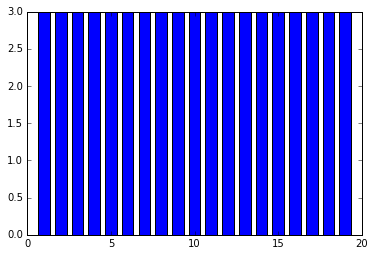

000. delta  zero two  certification 
001. one  delta  left four
002. hat backward alpha  two 
003. zero zero left cat 
004. information  echo end information 
005. two  four start  three
006. hat charlie bravo  information 
007. alpha  end alpha  one 
008. certification  right delta  start 
009. echo one  end forward
010. cat  certification  three four
011. charlie right charlie cat 
012. start  left backward right
013. three forward backward hat
014. bravo  echo bravo  forward


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline  

y = np.arange(corpus.shape[0])
f = np.repeat(y,3)
np.random.shuffle(f)
g = np.array_split(f,f.shape[0]/4)
print(f)
print(g[0])
print(corpus[g[0]])
hist, bins = np.histogram(f, bins=y+1)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

r= open("transcript_Test.txt", "w")
for i in xrange(0,f.shape[0]/4):
    sent = corpus[g[i]]
    sent = sent.tolist()
    sent = '%03d' % i + '. ' + ' '.join(sent)
    r.write(sent + '\n' + '\r\n')
    print sent
r.close()

In [4]:
def generateText (corpus,numWords,numRepeate,fileName,pltFlag):
    corpusIndx = np.arange(corpus.shape[0]) #generate array from 0:length(corpus)-1
    reapeatedIndx = np.repeat(corpusIndx,numRepeate) #Repeate the indecis 
    np.random.shuffle(reapeatedIndx) #randomly shuffle these indcices so the generated words looks random
    numSentences = reapeatedIndx.shape[0]/numWords
    arrayOfIndx = np.array_split(reapeatedIndx,numSentences)
    
    f = open(fileName, "w")
    for i in xrange(0,numSentences):
        sent = corpus[arrayOfIndx[i]]
        sent = sent.tolist()
        sent = '%03d' % (i+1) + '. ' + ' '.join(sent)
        f.write(sent + '\n' + '\r\n')
        print sent
    f.close()
    
    if pltFlag is True :
        hist, bins = np.histogram(reapeatedIndx, bins=corpusIndx+1)
        width = 0.7 * (bins[1] - bins[0])
        center = (bins[:-1] + bins[1:]) / 2
        plt.bar(center, hist, align='center', width=width)
        plt.show()

In [ ]:
generateText (corpus,4,7,'./S01/CorpusTrain_S01.txt',False)
generateText (corpus,4,7,'./S02/CorpusTrain_S02.txt',False)
generateText (corpus,4,7,'./S03/CorpusTrain_S03.txt',False)
generateText (corpus,4,7,'./S04/CorpusTrain_S04.txt',False)
generateText (corpus,4,7,'./S05/CorpusTrain_S05.txt',False)
generateText (corpus,4,7,'./S06/CorpusTrain_S06.txt',False)
generateText (corpus,4,7,'./S07/CorpusTrain_S07.txt',False)
generateText (corpus,4,7,'./S08/CorpusTrain_S08.txt',False)
generateText (corpus,4,7,'./S09/CorpusTrain_S09.txt',False)
generateText (corpus,4,7,'./S10/CorpusTrain_S10.txt',False)
generateText (corpus,4,3,'./S01/CorpusTest_S01.txt',False)
generateText (corpus,4,3,'./S02/CorpusTest_S02.txt',False)
generateText (corpus,4,3,'./S03/CorpusTest_S03.txt',False)
generateText (corpus,4,3,'./S04/CorpusTest_S04.txt',False)
generateText (corpus,4,3,'./S05/CorpusTest_S05.txt',False)
generateText (corpus,4,3,'./S06/CorpusTest_S06.txt',False)
generateText (corpus,4,3,'./S07/CorpusTest_S07.txt',False)
generateText (corpus,4,3,'./S08/CorpusTest_S08.txt',False)
generateText (corpus,4,3,'./S09/CorpusTest_S09.txt',False)
generateText (corpus,4,3,'./S10/CorpusTest_S10.txt',False)

In [8]:
    
    import pandas
    from collections import Counter
    
    corpus = []
    for i in open ('englishCorpus.txt'):
        tmp = i.split('\n')[0]
        if not (tmp == ''):
            corpus.append(tmp)
            
    letters = list(' '.join(corpus))
    letter_counts = Counter(letters)
    df = pandas.DataFrame.from_dict(letter_counts, orient='index')
    ax = df.plot(kind='bar') 
    fig = ax.get_figure()
    fig.savefig('asdf.png')

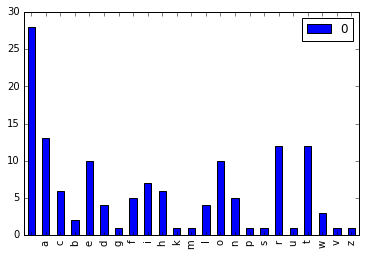

In [83]:
histogramOfLetters('/home/elbially/Speech Experiments/englishCorpus.txt') 

In [87]:
#! /usr/local/bin/python  -*- coding: UTF-8 -*-
pos_tweets = [(u' أساند كل عون أمن شريف', 'positive'), 
(u'ما أحلى الثورة التونسية', 'positive'), 
(u'أجمل طفل في العالم', 'positive'), 
(u'الشعب يحرس', 'positive'), 
(u'ثورة شعبنا هي ثورة الكـــرامة وثـــورة الأحــــرار', 'positive')] 

for i in pos_tweets:
  print i[0], i[1]

 أساند كل عون أمن شريف positive
ما أحلى الثورة التونسية positive
أجمل طفل في العالم positive
الشعب يحرس positive
ثورة شعبنا هي ثورة الكـــرامة وثـــورة الأحــــرار positive


In [92]:
import nltk
arpabet = nltk.corpus.cmudict.dict()

for word in corpus:
    try:
        print arpabet[word][0]
    except Exception as e:
        print e

'alpha '
'bravo '
[u'CH', u'AA1', u'R', u'L', u'IY0']
'delta '
[u'EH1', u'K', u'OW0']
[u'Z', u'IH1', u'R', u'OW0']
'one '
'two '
[u'TH', u'R', u'IY1']
[u'F', u'AO1', u'R']
'cat '
[u'HH', u'AE1', u'T']
'information '
'start '
[u'EH1', u'N', u'D']
[u'L', u'EH1', u'F', u'T']
[u'R', u'AY1', u'T']
[u'F', u'AO1', u'R', u'W', u'ER0', u'D']
[u'B', u'AE1', u'K', u'W', u'ER0', u'D']
'certification '


In [90]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [94]:
((80*50) + (20*60))/60


86

In [81]:
corpusIndx = np.arange(corpus.shape[0]) #generate array from 0:length(corpus)-1
reapeatedIndx = np.repeat(corpusIndx,7) #Repeate the indecis 
np.random.shuffle(reapeatedIndx) #randomly shuffle these indcices so the generated words looks random
        
f = open('test.txt', "w")
for i in xrange(0,reapeatedIndx.size):
    sent = corpus[reapeatedIndx[i]]
    sent = sent.tolist()
    sent = '%03d' % i + '. ' + sent
    f.write(sent + '\n' + '\r\n')
    #print sent
f.close()

In [70]:
import random
def randomize_carefully(elems, n_repeat=10):
    s = set(elems)
    res = []
    for n in range(n_repeat):
        if res:
            # Avoid the last placed element
            lst = list(s.difference({res[-1]}))
            # Shuffle
            random.shuffle(lst)
            lst.append(res[-1])
            # Shuffle once more to avoid obvious repeating patterns in the last position
            lst[1:] = random.sample(lst[1:], len(lst)-1)
        else:
            lst = elems[:]
            random.shuffle(lst)
        res.extend(lst)
    return res

In [80]:
x = randomize_carefully(corpus.tolist())
import collections
counter=collections.Counter(x)

y = np.array(x)
numSentences = y.shape[0]/numWords
arrayOfWords= np.array_split(y,numSentences)
    
f = open('test.txt',"w")
for i in xrange(0,numSentences):
    sent = arrayOfWords[i]
    sent = sent.tolist()
    sent = '%03d' % (i+1) + '. ' + ' '.join(sent)
    f.write(sent + '\n' + '\r\n')
    print sent
f.close()

001. forward certification  backward information 
002. zero right four one 
003. left charlie delta  alpha 
004. start  echo hat two 
005. three bravo  cat  end
006. hat end delta  certification 
007. echo three one  cat 
008. right forward backward alpha 
009. four start  bravo  information 
010. two  zero left charlie
011. cat  information  charlie delta 
012. hat two  certification  end
013. one  forward left bravo 
014. backward start  zero alpha 
015. right three four echo
016. right two  start  left
017. information  cat  bravo  certification 
018. three echo end alpha 
019. one  delta  backward four
020. charlie forward zero hat
021. alpha  zero charlie certification 
022. cat  four hat information 
023. one  left echo bravo 
024. right delta  backward forward
025. three start  two  end
026. alpha  end right echo
027. charlie left delta  four
028. certification  one  start  zero
029. forward hat cat  backward
030. bravo  information  two  three
031. echo bravo  hat forward
032. 

In [82]:
import codecs

In [84]:
#! /usr/local/bin/python  -*- coding: UTF-8 -*-
pos_tweets = [(u' أساند كل عون أمن شريف', 'positive'), 
(u'ما أحلى الثورة التونسية', 'positive'), 
(u'أجمل طفل في العالم', 'positive'), 
(u'الشعب يحرس', 'positive'), 
(u'ثورة شعبنا هي ثورة الكـــرامة وثـــورة الأحــــرار', 'positive')] 

for i in pos_tweets:
  print i[0]

 أساند كل عون أمن شريف
ما أحلى الثورة التونسية
أجمل طفل في العالم
الشعب يحرس
ثورة شعبنا هي ثورة الكـــرامة وثـــورة الأحــــرار


In [19]:
import arabic_reshaper
from bidi.algorithm import get_display

#...
reshaped_text = arabic_reshaper.reshape(u'واحد')
bidi_text = get_display(reshaped_text)
len(reshaped_text)

4

In [25]:
f = open('test.txt',"w")
for i in xrange(0,len(reshaped_text)):
    sent = reshaped_text[i]
    sent = '%03d' % (i+1) + '. ' + sent
    f.write(sent.encode('utf-8') + '\n' + '\r\n')
    print sent
f.close()

001. ﻭ
002. ا
003. ﺣ
004. ﺪ


In [15]:
import numpy as np
import editdist
import random

corpus = []
for i in open ('/home/elbially/Speech Experiments/arabicCorpus.txt','r'):
    tmp = i.split('\n')[0]
    if not (tmp == ''):
        corpus.append(i.decode('utf-8'))
        corpus = [r.split('\n')[0] for r in corpus]
    
corpus = np.array(corpus)
corpusIndx = np.arange(corpus.shape[0]) #generate array from 0:length(corpus)-1
reapeatedIndx = np.repeat(corpusIndx,20) #Repeate the indecis 
np.random.shuffle(reapeatedIndx) #randomly shuffle these indcices so the generated words looks random
numSentences = reapeatedIndx.shape[0]/4
arrayOfIndx = np.array_split(reapeatedIndx,numSentences)
    
f = open('hello.txt', "w")
for i in xrange(0,numSentences):
    sent = corpus[arrayOfIndx[i]]
    sent = sent.tolist()
    sent = '%03d' % (i+1) + '. ' + ' '.join(sent)
    f.write(sent.encode('utf-8') + '\n' + '\r\n')
    print sent
f.close()

001. أثنين الأحد  عشرة ستة
002. خمسة ثلاثة ثلاثة الأحد 
003. صفر الخميس أثنين تسعة
004. الأحد  الثلاثاء صفر صفر
005. عشرة ثلاثة خمسة ثلاثة
006. ستة الأربعاء صفر الأربعاء
007. اﻷثنين واحد الخميس ثلاثة
008. عشرة أربعة تسعة ثلاثة
009. ثمانية ستة الخميس صفر
010. عشرة الأربعاء أثنين ثلاثة
011. ستة أثنين الخميس خمسة
012. الثلاثاء ثمانية واحد ثلاثة
013. أثنين الجمعة الخميس الأربعاء
014. الخميس سبعة أربعة سبعة
015. تسعة السبت  واحد أثنين
016. اﻷثنين اﻷثنين تسعة ثمانية
017. تسعة اﻷثنين ثمانية واحد
018. الأحد  اﻷثنين ثلاثة تسعة
019. الخميس أثنين الأحد  تسعة
020. خمسة الثلاثاء أربعة السبت 
021. عشرة ثمانية ثمانية الجمعة
022. الجمعة واحد صفر ثلاثة
023. عشرة الأحد  السبت  صفر
024. الخميس الجمعة أثنين الثلاثاء
025. عشرة سبعة ثمانية عشرة
026. ثمانية أثنين الثلاثاء صفر
027. الثلاثاء عشرة تسعة أربعة
028. واحد الأحد  الأحد  أربعة
029. عشرة ثمانية خمسة خمسة
030. واحد ستة الأحد  الأربعاء
031. سبعة الثلاثاء الثلاثاء ستة
032. السبت  الخميس سبعة الأربعاء
033. أثنين الأربعاء اﻷثنين صفر
034. واحد الثلاثاء عشرة

In [16]:
corpus.shape[0]

18

In [17]:
print corpus[0]
x = corpus[0]
x.decode('utf8')

صفر


UnicodeEncodeError: 'ascii' codec can't encode characters in position 0-2: ordinal not in range(128)

In [2]:
from Levenshtein import distance

In [27]:
query1=corpus[0]
query2=corpus[1]
print distance(query1, query2)

4


In [21]:
print u'unicode: Institut f\374r Festk\366rperphysik'

unicode: Institut für Festkörperphysik


In [26]:
print ['u' + s for s in corpus]

[u'u\u0635\u0641\u0631', u'u\u0648\u0627\u062d\u062f', u'u\u0623\u062b\u0646\u064a\u0646', u'u\u062b\u0644\u0627\u062b\u0629', u'u\u0623\u0631\u0628\u0639\u0629', u'u\u062e\u0645\u0633\u0629', u'u\u0633\u062a\u0629', u'u\u0633\u0628\u0639\u0629', u'u\u062b\u0645\u0627\u0646\u064a\u0629', u'u\u062a\u0633\u0639\u0629', u'u\u0639\u0634\u0631\u0629', u'u\u0627\u0644\u0633\u0628\u062a ', u'u\u0627\u0644\u0623\u062d\u062f ', u'u\u0627\ufef7\u062b\u0646\u064a\u0646', u'u\u0627\u0644\u062b\u0644\u0627\u062b\u0627\u0621', u'u\u0627\u0644\u0623\u0631\u0628\u0639\u0627\u0621', u'u\u0627\u0644\u062e\u0645\u064a\u0633', u'u\u0627\u0644\u062c\u0645\u0639\u0629']


In [31]:
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper
import networkx as nx

# Arabic text preprocessing 
reshaped_text = arabic_reshaper.reshape(u'لغةٌ عربيّة')
artext = get_display(reshaped_text)
matplotlib.rcParams.update({'font.family' : 'TraditionalArabic'})
# constructing the sample graph
G=nx.Graph()
G.add_edge('a', artext ,weight=0.6)
pos=nx.spring_layout(G) 
nx.draw_networkx_nodes(G,pos,node_size=700)
nx.draw_networkx_edges(G,pos,edgelist=G.edges(data=True),width=6)
plt.rc('font',family='Times New Roman')
# Drawing Arabic text
# Just Make sure your version of the font 'Times New Roman' has Arabic in it. 
# You can use any Arabic font here.
nx.draw_networkx_labels(G,pos,font_size=20,font_family='Times New Roman')

# showing the graph
plt.axis('off')
plt.show()


UnicodeEncodeError: 'ascii' codec can't encode characters in position 328-332: ordinal not in range(128)

UnicodeEncodeError: 'ascii' codec can't encode characters in position 328-332: ordinal not in range(128)

UnicodeEncodeError: 'ascii' codec can't encode characters in position 328-333: ordinal not in range(128)

In [7]:
print reshaped_text

ﻟﻐﺔٌ ﻋﺮﺑﻴّﺔ


In [22]:
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper

reshaped_text = arabic_reshaper.reshape(u'لغةٌ عربيّة')
artext = get_display(reshaped_text)

plt.text(0.25, 0.45, artext , family = 'Times New Roman',fontsize=50)
plt.show()

In [25]:
from pylab import *
figure(1) # the first figure
plot([1,2,3])
figure(1) # figure 1 current
title(u'برهان',family='Times New Roman') # figure 1 title
savefig('test.png')
savefig('test.eps')
show()